In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Datasets loading

In [2]:
df=pd.read_csv("../data/raw/heart.csv")
df.rename(columns={
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trtbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalachh': 'max_heart_rate',
    'exng': 'exercise_induced_angina',
    'oldpeak': 'oldpeak',
    'slp': 'slope',
    'caa': 'num_major_vessels',
    'thall': 'thalassemia',
    'output': 'target'
}, inplace=True)

df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Explenation

### 1. `age`
- **Description:** Age of the patient in years.
- **Type:** Numerical

### 2. `sex`
- **Description:** Sex of the patient.
- **Type:** Categorical (Binary)
  - **0:** Female
  - **1:** Male

### 3. `chest_pain_type`
- **Description:** Type of chest pain experienced by the patient.
- **Type:** Categorical
  - **1:** Typical angina
  - **2:** Atypical angina
  - **3:** Non-anginal pain
  - **4:** Asymptomatic

### 4. `resting_blood_pressure`
- **Description:** Resting blood pressure in mm Hg.
- **Type:** Numerical

### 5. `cholesterol`
- **Description:** Serum cholesterol in mg/dl.
- **Type:** Numerical

### 6. `fasting_blood_sugar`
- **Description:** Fasting blood sugar > 120 mg/dl.
- **Type:** Categorical (Binary)
  - **0:** False
  - **1:** True

### 7. `resting_ecg`
- **Description:** Resting electrocardiographic results.
- **Type:** Categorical
  - **0:** Normal
  - **1:** Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - **2:** Showing probable or definite left ventricular hypertrophy by Estes' criteria

### 8. `max_heart_rate`
- **Description:** Maximum heart rate achieved.
- **Type:** Numerical

### 9. `exercise_induced_angina`
- **Description:** Exercise-induced angina.
- **Type:** Categorical (Binary)
  - **0:** No
  - **1:** Yes

### 10. `oldpeak`
- **Description:** ST depression induced by exercise relative to rest.
- **Type:** Numerical

### 11. `slope`
- **Description:** The slope of the peak exercise ST segment.
- **Type:** Categorical
  - **0:** Upsloping
  - **1:** Flat
  - **2:** Downsloping

### 12. `num_major_vessels`
- **Description:** Number of major vessels (0-4) colored by fluoroscopy.
- **Type:** Categorical

### 13. `thalassemia`
- **Description:** Thalassemia (a blood disorder).
- **Type:** Categorical
  - **1:** Normal
  - **2:** Fixed defect
  - **3:** Reversible defect

### 14. `target`
- **Description:** Target variable indicating the presence of heart disease.
- **Type:** Categorical (Binary)
  - **0:** Less chance of heart attack
  - **1:** More chance of heart attack


In [3]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
oldpeak                    float64
slope                        int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [4]:
# Convert columns to appropriate data types
df = df.astype({
    'age': 'int64',                    
    'sex': 'category',                 
    'chest_pain_type': 'category',     
    'resting_blood_pressure': 'int64', 
    'cholesterol': 'int64',            
    'fasting_blood_sugar': 'category', 
    'resting_ecg': 'category',         
    'max_heart_rate': 'int64',         
    'exercise_induced_angina': 'category', 
    'oldpeak': 'float64',              
    'slope': 'category',               
    'num_major_vessels': 'category',      
    'thalassemia': 'category',         
    'target': 'category'               
})

df.dtypes

age                           int64
sex                        category
chest_pain_type            category
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar        category
resting_ecg                category
max_heart_rate                int64
exercise_induced_angina    category
oldpeak                     float64
slope                      category
num_major_vessels          category
thalassemia                category
target                     category
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


- **Distribution**: Most variables exhibit a relatively normal distribution, with some showing signs of skewness (e.g., cholesterol and oldpeak).

- **Variability**: There is significant variability in patient metrics like cholesterol levels and maximum heart rate achieved, indicating a diverse patient group.

- **Potential Outliers**: The range for some variables, such as cholesterol (up to 564 mg/dl) and oldpeak (up to 6.2), suggests the presence of outliers, which might need further investigation.

- **Clinical Implications**: The higher-than-normal averages for blood pressure and cholesterol suggest that a significant portion of the patients might be at risk for heart disease, which aligns with the dataset's context.

In [6]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

No null values

# EDA

## Correlation Matrix


In [7]:
# Generate the correlation matrix plot
fig = px.imshow(df.corr(), 
                title="Correlation Plot",
                color_continuous_scale='RdBu_r',  
                aspect="auto"  
               )

# Update layout to center the plot
fig.update_layout(
    autosize=True,  
    margin=dict(l=0, r=0, t=50, b=0),  # Reduce margins to maximize plot area
    width=800,  
    height=800,  
    title_x=0.5,  
    title_y=0.95,  
    xaxis=dict(constrain="domain"),  
    yaxis=dict(constrain="domain"),  
)

# Center the plot in the available space by adjusting the layout
fig.update_xaxes(scaleanchor="y", scaleratio=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()

### Correlation Matrix Analysis

1. **Strong Positive Correlations:**
   - **`chest_pain_type` and `target` (0.4338):** There is a moderate positive correlation, suggesting that certain types of chest pain might be associated with a higher risk of heart disease.
   - **`max_heart_rate` and `target` (0.4217):** Higher maximum heart rates are moderately positively correlated with a higher chance of heart disease, indicating that patients achieving higher heart rates during exercise may have a higher risk.
   - **`slope` and `target` (0.3459):** The slope of the peak exercise ST segment shows a positive correlation with the target, indicating its potential relevance in predicting heart disease.

2. **Strong Negative Correlations:**
   - **`exercise_induced_angina` and `target` (-0.4368):** This strong negative correlation suggests that patients with exercise-induced angina are more likely to have heart disease.
   - **`oldpeak` and `target` (-0.4307):** A higher ST depression induced by exercise is strongly negatively correlated with the target, suggesting it is a significant predictor of heart disease.
   - **`num_major_vessels` and `target` (-0.3917):** The number of major vessels colored by fluoroscopy is negatively correlated with the presence of heart disease, indicating that more colored vessels might correlate with a higher chance of heart disease.
   - **`thalassemia` and `target` (-0.3440):** The presence of thalassemia is negatively correlated with the target, suggesting a possible relationship between this blood disorder and heart disease risk.

3. **Other Noteworthy Correlations:**
   - **`age` and `max_heart_rate` (-0.3985):** As expected, there is a strong negative correlation between age and maximum heart rate, indicating that younger patients tend to have higher maximum heart rates.
   - **`oldpeak` and `slope` (-0.5775):** A significant negative correlation is observed between ST depression and the slope of the peak exercise ST segment, which might indicate that a steeper slope is associated with less ST depression.

4. **Weak or Insignificant Correlations:**
   - **`cholesterol` and most features:** Cholesterol has weak correlations with most other features, indicating that it might not be a strong standalone predictor of heart disease in this dataset.
   - **`resting_blood_pressure` and `target` (-0.1449):** There is a weak negative correlation between resting blood pressure and the presence of heart disease, suggesting that resting blood pressure alone may not be a strong indicator.

### Implications for Prediction:

- **Feature Selection:** The significant correlations (both positive and negative) suggest that features like `chest_pain_type`, `max_heart_rate`, `exercise_induced_angina`, and `oldpeak` are important predictors for heart disease and should be considered carefully in predictive modeling.
- **Model Considerations:** The correlations can help in identifying potential multicollinearity issues. For instance, the strong correlation between `oldpeak` and `slope` might necessitate careful handling to avoid redundancy in models.

## Bivariate Analysis

In [8]:
df_bivariate = df.copy()
df_bivariate['target'] = df_bivariate['target'].replace({1: 'More Chance', 0: 'Less Chance'})

In [9]:

fig = sp.make_subplots(rows=2, cols=4, subplot_titles=[
    "Sex", 
    "Exercise Induced Angina", 
    "Number of Major Vessels", 
    "Chest Pain Type", 
    "Fasting Blood Sugar", 
    "Resting ECG", 
    "Slope", 
    "Thalassemia"
])

# List of categorical columns to plot
categorical_columns = [
    ('sex', 'Sex'),
    ('exercise_induced_angina', 'Exercise Induced Angina'),
    ('num_major_vessels', 'Number of Major Vessels'),
    ('chest_pain_type', 'Chest Pain Type'),
    ('fasting_blood_sugar', 'Fasting Blood Sugar'),
    ('resting_ecg', 'Resting ECG'),
    ('slope', 'Slope'),
    ('thalassemia', 'Thalassemia')
]

# Create a count plot for each categorical variable
for i, (column, title) in enumerate(categorical_columns, start=1):
    # Create the plot with multiple colors based on 'target'
    plot = px.histogram(df_bivariate, x=column, color='target', title=title, color_discrete_sequence=px.colors.sequential.RdBu)
    
    # Add the trace to the appropriate subplot
    for trace in plot['data']:
        trace.showlegend = (i == 1)  # Show legend only for the first set of plots
        fig.add_trace(trace, row=(i-1)//4+1, col=(i-1)%4+1)

# Update layout for the figure
fig.update_layout(
    height=800, width=1200,
    title_text="Count Plot for Categorical Variables with Respect to Target",
    title_x=0.5
)

# Show the plot
fig.show()

The count plots visually reinforce the insights obtained from the correlation matrix analysis:

1. **Chest Pain Type**:
   - The positive correlation between `chest_pain_type` and the likelihood of heart disease is supported by the count plot. It shows that certain types of chest pain, such as typical angina (coded as `0`), are more common among patients with a lower chance of heart disease, while other types like non-anginal pain (coded as `2`) are more associated with a higher chance of heart disease.

2. **Exercise Induced Angina**:
   - The negative correlation between `exercise_induced_angina` and heart disease risk is evident in the count plot. Patients without exercise-induced angina (`0`) tend to have a higher likelihood of heart disease, whereas those with exercise-induced angina (`1`) are more represented in the lower risk category.

3. **Number of Major Vessels**:
   - The negative correlation between `num_major_vessels` and the likelihood of heart disease is visualized in the count plot, showing that patients with fewer major vessels tend to have a higher risk of heart disease. Conversely, those with more major vessels colored by fluoroscopy tend to fall into the lower risk category.

4. **Slope**:
   - The positive correlation between `slope` and heart disease risk is illustrated in the count plot. A downward or flat slope (coded as `1` or `2`) is associated with a higher chance of heart disease, while an upsloping ST segment (coded as `0`) is more common in patients with a lower chance of heart disease.

### Implications for Prediction

These visualizations, combined with the correlation analysis, suggest that features such as `chest_pain_type`, `exercise_induced_angina`, `num_major_vessels`, and `slope` are crucial in predicting heart disease. The count plots not only confirm the statistical relationships but also provide a clear, intuitive understanding of how these features are distributed with respect to the target variable.

In [10]:
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=[
    "Age", 
    "Resting Blood Pressure", 
    "Cholesterol", 
    "Max Heart Rate", 
    "Oldpeak"
])

# List of continuous columns to plot
continuous_columns = [
    ('age', 'Age'),
    ('resting_blood_pressure', 'Resting Blood Pressure'),
    ('cholesterol', 'Cholesterol'),
    ('max_heart_rate', 'Max Heart Rate'),
    ('oldpeak', 'Oldpeak')
]

# Create a box plot for each continuous variable
for i, (column, title) in enumerate(continuous_columns, start=1):
    # Create the boxplot with multiple colors based on 'target'
    plot = px.box(df_bivariate, x='target', y=column, color='target', title=title, color_discrete_sequence=px.colors.sequential.RdBu)
    
    # Add the trace to the appropriate subplot
    for trace in plot['data']:
        trace.showlegend = (i == 1)  # Show legend only for the first set of plots
        fig.add_trace(trace, row=1, col=i)

# Update layout for the figure
fig.update_layout(
    height=400, width=1500,  # Adjusted for a single row with 5 columns
    title_text="Box Plots for Continuous Variables with Respect to Target",
    title_x=0.5,
    showlegend=True  # Ensure the legend is shown
)

# Show the plot
fig.show()

1. **Age**:
   - **Distribution**: The median age for patients with a "Less Chance" of heart disease is slightly higher than for those with a "More Chance" of heart disease. This indicates that the "Less Chance" group tends to be older.
   - **Implication**: Although age is generally considered a risk factor for heart disease, this dataset suggests that older individuals might be at lower risk, possibly due to other health factors that mitigate this risk.

2. **Resting Blood Pressure**:
   - **Distribution**: The median resting blood pressure is quite similar between the two groups, though the "Less Chance" group displays a slightly wider range and more outliers.
   - **Implication**: The similarity in resting blood pressure across both groups suggests it may not be a decisive factor on its own in predicting heart disease, though extreme values could still contribute to risk.

3. **Cholesterol**:
   - **Distribution**: Both groups have comparable median cholesterol levels. However, the "More Chance" group shows more outliers at higher cholesterol levels.
   - **Implication**: While cholesterol levels are similar between the groups, the presence of high outliers in the "More Chance" group indicates that extreme cholesterol levels could be more associated with an increased risk of heart disease.

4. **Max Heart Rate**:
   - **Distribution**: The "More Chance" group generally achieves higher maximum heart rates compared to the "Less Chance" group, which has a lower median.
   - **Implication**: Higher maximum heart rates are clearly associated with a higher likelihood of heart disease, reinforcing the importance of cardiovascular fitness in mitigating heart disease risk.

5. **Oldpeak (ST Depression Induced by Exercise)**:
   - **Distribution**: The "Less Chance" group exhibits significantly higher oldpeak values with a broader range and more extreme outliers compared to the "More Chance" group.
   - **Implication**: Higher oldpeak values, which indicate greater ST depression during exercise, are strongly associated with a decreased likelihood of heart disease, making this feature a critical predictor.

### Implications for Prediction

The insights derived from these box plots suggest that different continuous features have varying levels of influence on heart disease prediction:

- **Age**: Although older age typically suggests higher risk, in this dataset, older individuals in the "Less Chance" group might have other protective factors at play, suggesting that age should be considered alongside other health indicators.
  
- **Resting Blood Pressure**: The similar distributions across both groups imply that while resting blood pressure is an important health metric, it may not be a standalone predictor of heart disease but could contribute to a more complex risk profile.

- **Cholesterol**: High cholesterol outliers in the "More Chance" group reinforce the need to monitor extreme cholesterol levels, as they appear more frequently in individuals at higher risk of heart disease.

- **Max Heart Rate**: This feature stands out as a strong indicator of heart disease risk, with lower max heart rates being associated with higher risk, highlighting the importance of cardiovascular fitness in reducing heart disease risk.

- **Oldpeak**: The relationship between higher oldpeak values and a lower likelihood of heart disease suggests this feature could be crucial in predictive modeling, particularly in evaluating heart function during physical stress.



<Figure size 1500x1000 with 0 Axes>

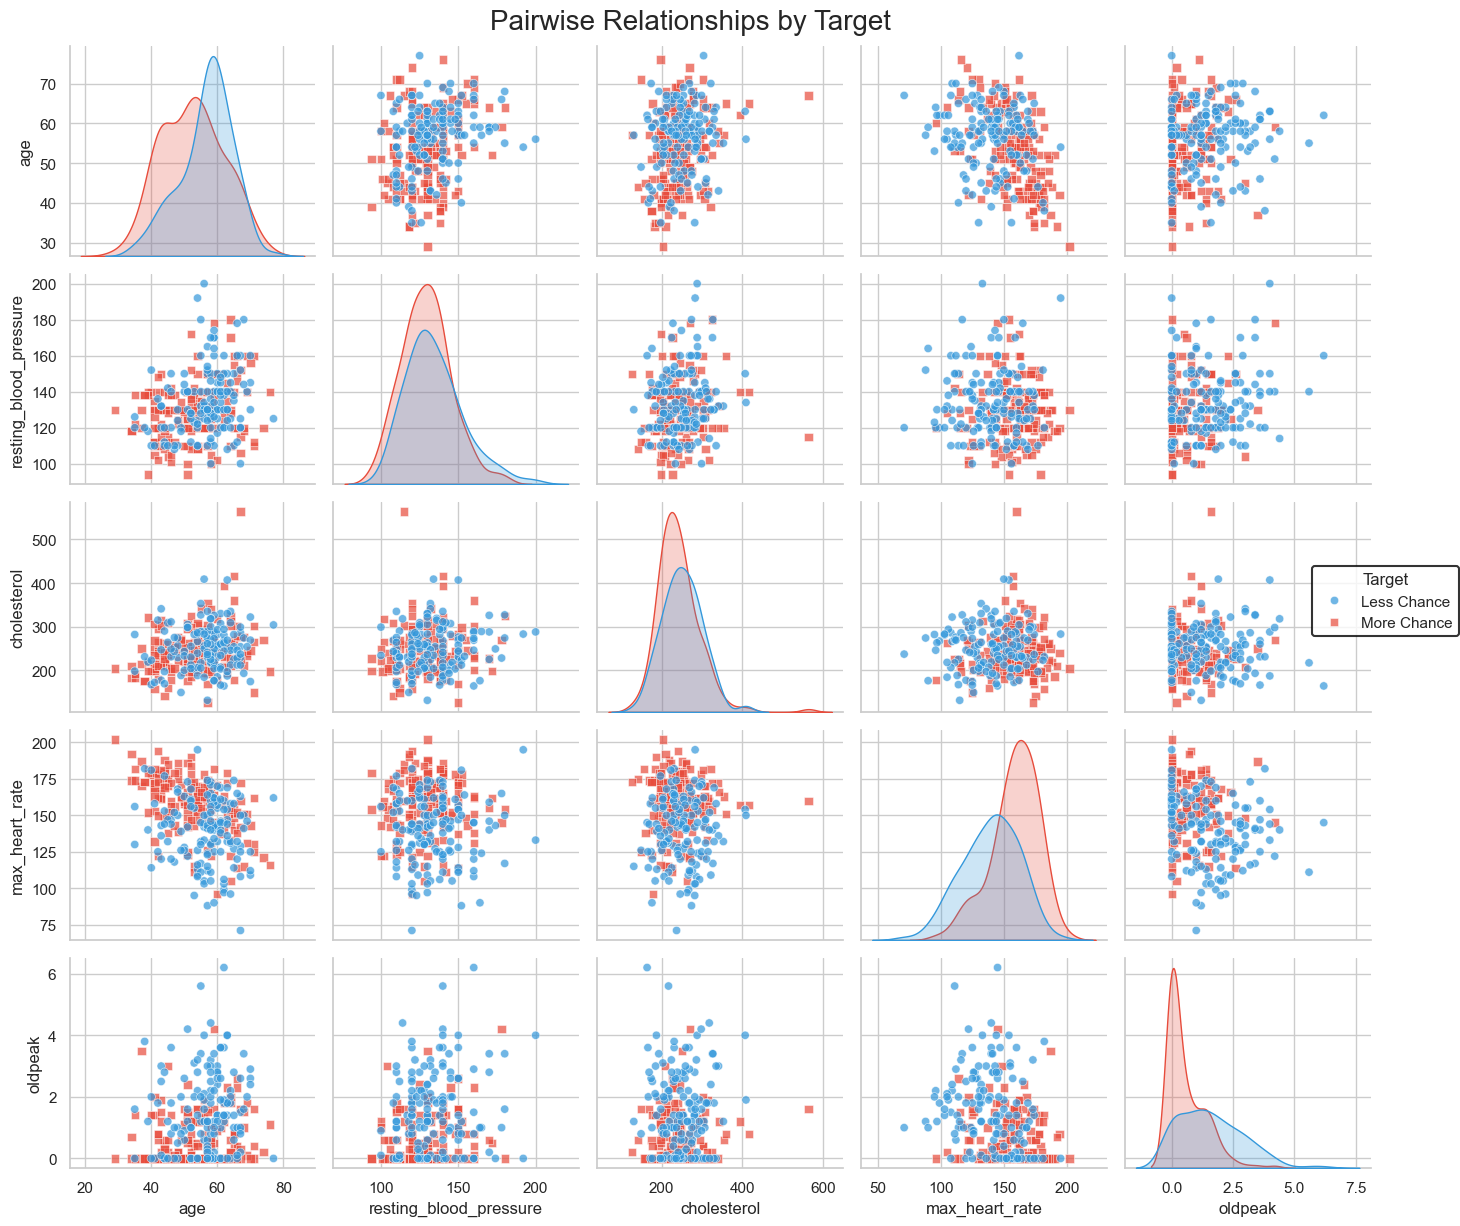

In [11]:
# Set the style and color palette for a more professional look
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(15, 10))

# Create the pairplot with a custom palette and adjust the plot for aesthetics
pairplot = sns.pairplot(df_bivariate, hue="target", 
                        palette=sns.color_palette(["#3498db", "#e74c3c"]), 
                        markers=["o", "s"], 
                        plot_kws={'alpha': 0.7})

# Set the overall title and adjust the title font
pairplot.figure.suptitle("Pairwise Relationships by Target", 
                         fontsize=20)

# Adjust the layout so the title fits well with the plots
plt.tight_layout()

# Add a legend outside the plot
pairplot._legend.set_bbox_to_anchor((1.05, 0.5))  # Position the legend outside the plot
pairplot._legend.set_title("Target")  # Set the legend title
pairplot._legend.set_frame_on(True)  # Add a border around the legend
pairplot._legend.get_frame().set_edgecolor('black')  # Set the border color
pairplot._legend.get_frame().set_linewidth(1.5)  # Set the border thickness
pairplot._legend.get_frame().set_facecolor('white')  # Set the background color of the legend

plt.show()

- **Max Heart Rate** and **Oldpeak** stand out as the most distinguishing features, showing clear separation between individuals with higher and lower chances of heart disease. These features are likely to be key predictors in any model developed for this dataset.
- **Age**, **Resting Blood Pressure**, and **Cholesterol** show considerable overlap between the two groups, indicating that while they are important health metrics, they might not be sufficient alone for predicting heart disease without considering other variables.
- The **density plots** along the diagonal give a good indication of the distribution of each feature by target group, with max heart rate and oldpeak showing the most pronounced differences.

In [12]:
#countplot for target with plotly
fig = px.histogram(df_bivariate, x='target', title='Target Count Plot', color='target', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

1. **Balance of the Classes**:
   - The plot shows that there are more individuals in the "More Chance" category than in the "Less Chance" category. This indicates a slight imbalance in the dataset, where the majority of the individuals are classified as having a higher likelihood of heart disease.
   
2. **Potential Implications**:
   - The imbalance in the target classes could impact model training, as machine learning models may become biased towards predicting the majority class (in this case, "More Chance").
   - It will be important to consider techniques such as class weighting, resampling, or using specific evaluation metrics (like the F1-score) to address this imbalance during model development.

In summary, this count plot highlights the distribution of the target variable, underscoring the need to carefully consider class imbalance in subsequent modeling efforts to ensure accurate and fair predictions.

# PCA

In [13]:
#apply PCA to the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = df_bivariate.drop('target', axis=1)
X = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, 
                      columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Add the target column to the DataFrame
df_pca['target'] = df_bivariate['target']

#plot PCA with blue adn red colors with plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='target', 
                    title="3D Scatter Plot of PCA",
                    color_discrete_sequence=['#3498db', '#e74c3c'])

# Update layout for the figure
fig.update_layout(
    height=800, width=800,
    title_x=0.5
)

# Show the plot
fig.show()



1. **Cluster Formation**:
   - There is some overlap between the "More Chance" (blue) and "Less Chance" (red) groups, indicating that the two classes are not perfectly separable in this reduced three-dimensional space.
   - However, there are areas where one color dominates, suggesting that the PCA has been somewhat successful in distinguishing between the two groups.

2. **Dimensionality Reduction**:
   - The PCA scatter plot shows that the first three principal components capture a significant amount of the variance in the data, but not all of it. This is evident from the overlap between the classes.
   - Despite this, PCA has helped in visualizing the complex relationships in the data by reducing it to three dimensions, making it easier to observe potential patterns and separations.

## Automatic Feature Selection

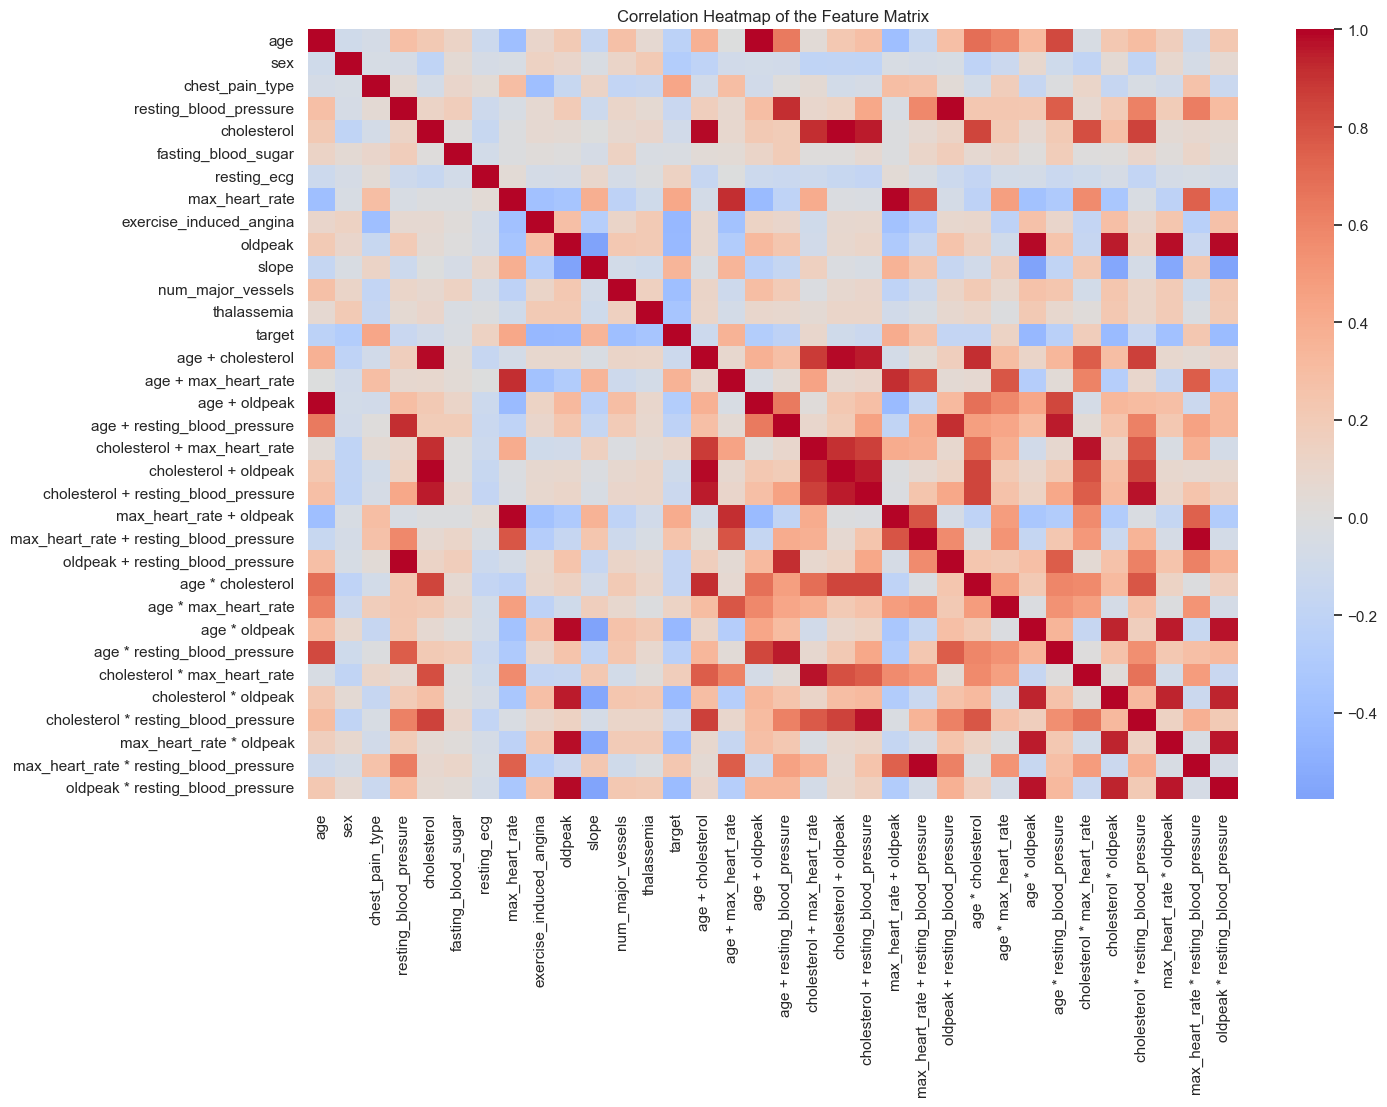

In [14]:
import featuretools as ft


# Create a new entityset
es = ft.EntitySet(id='heart_data')

# Add the entire dataframe as an entity
es = es.add_dataframe(
    dataframe_name='heart_data', 
    dataframe=df, 
    index='index',
)

# Automatically generate features using DFS (Deep Feature Synthesis)
feature_matrix, feature_defs = ft.dfs(
    entityset=es, 
    target_dataframe_name="heart_data", 
    agg_primitives=["mean", "sum", "mode"], 
    trans_primitives=["add_numeric", "multiply_numeric"]
)

#plot the feature matrix with matplotlib
plt.figure(figsize=(15, 10))
sns.heatmap(feature_matrix.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of the Feature Matrix")
plt.show()



# Preprocessing

## rebalancing

In [16]:
#rebalance with SMOTENC
from imblearn.over_sampling import SMOTENC

df_no_target = df.drop('target', axis=1)
# Define the categorical columns
categorical_columns = df_no_target.select_dtypes(include=['category']).columns

# Define the indices of the categorical columns
categorical_indices = [df_no_target.columns.get_loc(column) for column in categorical_columns]

# Initialize the SMOTENC object
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=0)

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(df_no_target, df['target'], test_size=0.2, random_state=0)

# Fit the SMOTENC object to the training data
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Combine the resampled data into a single DataFrame
df_resampled_train = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled_test = pd.concat([X_test, y_test], axis=1)

# add target column to the resampled data
df_resampled_train['target'] = y_resampled

df_resampled_train_renamed = df_resampled_train.copy()

#rename the target column values to be more descriptive
df_resampled_train_renamed['target'] = df_resampled_train['target'].replace({1: 'More Chance', 0: 'Less Chance'})

#countplot for target with plotly
fig = px.histogram(df_resampled_train_renamed, x='target', title='Target Count Plot', color='target', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Given the slight imbalance observed in the target variable, where the "More Chance" class is more prevalent than the "Less Chance" class, applying a technique like **SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous variables)** could be highly beneficial.

#### Key Points:

1. **Addressing Class Imbalance**:
   - SMOTENC is specifically designed to handle datasets with a mix of categorical and continuous features, making it suitable for this dataset, which includes both types of variables.
   - By generating synthetic examples of the minority class ("Less Chance"), SMOTENC can help balance the dataset. This will ensure that the machine learning model does not become biased towards the majority class ("More Chance").

2. **Preserving Feature Integrity**:
   - SMOTENC considers the nature of categorical features, preserving their integrity while creating synthetic samples. This is crucial because traditional SMOTE might treat categorical features as continuous, leading to unrealistic or invalid synthetic data points.

3. **Improving Model Performance**:
   - Applying SMOTENC can lead to improved model performance, particularly in terms of metrics like recall, F1-score, and AUC-ROC. By addressing class imbalance, the model is better able to learn the decision boundary between the classes, reducing the likelihood of false negatives, which is critical in a health-related context like heart disease prediction.

4. **Potential Drawbacks**:
   - While SMOTENC can enhance the balance of the dataset, it also introduces synthetic data, which might not perfectly reflect the real-world distribution. Careful validation and testing are required to ensure that the synthetic data contributes positively to the model's generalization capability.
   - It's important to monitor for overfitting, as models trained on oversampled data might learn noise instead of meaningful patterns.

In [17]:
# save non encoded/scaled df in the case a model need a custom encoding/scaling
df_resampled_train.to_csv("../data/processed/resampled/heart_resampled_train.csv", index=False)
df_resampled_test.to_csv("../data/processed/resampled/heart_resampled_test.csv", index=False)
df.to_csv("../data/processed/heart.csv", index=False)

## Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df_resampled_train_scaled = df_resampled_train.copy()
df_resampled_test_scaled = df_resampled_test.copy()

# Define the columns to scale
columns_to_scale = [
    'age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak'
]

# Scale the columns
df_resampled_train_scaled[columns_to_scale] = scaler.fit_transform(df_resampled_train_scaled[columns_to_scale])
df_resampled_test_scaled[columns_to_scale] = scaler.fit_transform(df_resampled_test_scaled[columns_to_scale])

df_resampled_train_scaled.head()


,index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thalassemia,target
0,74,0.291667,0,2,0.285714,0.189376,0,1,0.717557,0,0.032258,1,0,2,1
1,153,0.770833,0,2,0.530612,0.339492,0,0,0.618321,0,0.000000,1,1,2,1
2,64,0.604167,1,2,0.469388,0.184758,1,0,0.717557,0,0.000000,2,0,2,1
3,296,0.708333,0,0,0.306122,0.152425,0,1,0.496183,1,0.000000,1,0,2,0
4,287,0.583333,1,1,0.612245,0.233256,0,0,0.709924,0,0.000000,2,1,2,0


In [23]:
df_resampled_test_scaled.head()

,index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thalassemia,target
225,225,0.897436,1,0,0.481132,0.169611,0,1,0.288660,1,0.65,0,0,3,0
152,152,0.743590,1,3,0.716981,0.356890,0,0,0.597938,0,0.15,1,0,3,1
228,228,0.615385,1,3,0.716981,0.572438,0,0,0.639175,0,0.05,1,0,3,0
201,201,0.641026,1,0,0.292453,0.466431,0,0,0.453608,1,0.70,1,1,3,0
52,52,0.692308,1,2,0.339623,0.371025,0,1,0.505155,0,0.45,1,3,3,1


In [24]:
# apply the same to the original df
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled.head()


,index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thalassemia,target
0,0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


## Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
# apply one hot encoding to the resampled data

# Separating features and target
X = df_resampled_train_scaled.drop('target', axis=1)
y = df_resampled_train_scaled['target']


X_categorical = X.select_dtypes(include=['object', 'category'])

# Initialize the OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')

# Fit and transform the data
X_encoded = onehot_encoder.fit_transform(X_categorical)

# Combine the encoded data with the remaining features
X_encoded = pd.concat([X.drop(X_categorical.columns, axis=1), X_encoded, y], axis=1)

X_encoded.head()

X_encoded.to_csv("../data/processed/resampled/heart_resampled_train_se.csv", index=False)


In [27]:
# Separating features and target
X = df_resampled_test_scaled.drop('target', axis=1)
y = df_resampled_test_scaled['target']


X_categorical = X.select_dtypes(include=['object', 'category'])

# Initialize the OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')

# Fit and transform the data
X_encoded = onehot_encoder.fit_transform(X_categorical)

# Combine the encoded data with the remaining features
X_encoded = pd.concat([X.drop(X_categorical.columns, axis=1), X_encoded, y], axis=1)

X_encoded.head()

X_encoded.to_csv("../data/processed/resampled/heart_resampled_test_se.csv", index=False)

In [30]:
# apply one hot encoding to the original data

# Separating features and target
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_categorical = X.select_dtypes(include=['object', 'category'])

# Initialize the OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')

# Fit and transform the data
X_encoded = onehot_encoder.fit_transform(X_categorical)

# Combine the encoded data with the remaining features
X_encoded = pd.concat([X.drop(X_categorical.columns, axis=1), X_encoded, y], axis=1)

X_encoded.head()

# save the encoded data
X_encoded.to_csv("../data/processed/heart_se.csv", index=False)


#